In [1]:
# Imports
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
import statistics as stat

ModuleNotFoundError: No module named 'pandas'

In [29]:
# Load the heart disease dataset:
dataframe = pd.read_csv("../data/heart.csv")
dataframe.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**Question 1: Data Exploration Questions**
* Question 1.1: How many positive examples of heart disease are in this dataset?
* Question 1.2: How many negative examples (no heart disease) are in this dataset?
* Question 1.3: What is the average age for subjects in this dataset?
* Question 1.4: Which variable is most positively correlated with heart disease?
* Question 1.5: Which variable is most negatively correlated with heart disease?
* Question 1.6: How much does Age correlate with Max Heart Rate (MaxHR)?

**Question 1: Answers**
* Question 1.1: 508 positive examples of heart disease.
* Question 1.2: 410 negative examples of heart disease.
* Question 1.3: 53.51 years is the average age for the subjects.
* Question 1.4: Oldpeak is most positively correlated with heart disease.
* Question 1.5: MaxHR is most negatively correlated with heart disease.
* Question 1.6: Age correlates with MaxHR for -0.382045.

**The proof is shown in the code below. There may be comments stating which question each block of code is meant to prove.**

In [30]:
# Question 1.1: How many positive examples of heart disease are in this dataset?
# Question 1.2: How many negative examples (no heart disease) are in this dataset?
q1_1, q1_2 = 0, 0
for i in dataframe["HeartDisease"]:
    if i == 1:
        q1_1 += 1
    elif i == 0:
        q1_2 += 1
print("Question 1.1: The number of positive examples of heart disease", q1_1)
print("Question 1.2: The number of negative examples of heart disease", q1_2)

# Question 1.3: What is the average age for subjects in this dataset?
print("Question 1.3: The average age for subjects in the dataset", stat.mean(dataframe["Age"]))

Question 1.1: The number of positive examples of heart disease 508
Question 1.2: The number of negative examples of heart disease 410
Question 1.3: The average age for subjects in the dataset 53.510893246187365


In [31]:
dataframe.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [32]:
# Question 1.4: Which variable is most positively correlated with heart disease?
print("Question 1.4: Oldpeak is most positively correlated with heart disease.")
# This answer is derived from the table above when running dataframe.corr().
# We know Oldpeak is the variable most positively correlated with heart disease
# because Oldpeak has 0.403951 in the HeartDisease column while the other
# variables are either negative or a lower positive number.

# Question 1.5: Which variable is most negatively correlated with heart disease?
print("Question 1.5: MaxHR is most negatively correlated with heart disease.")
# This answer is derived from the table above when running dataframe.corr().
# We know MaxHR is most negatively correlated with heart disease
# because MaxHR has -0.400421 in the HeartDisease column while the other
# variables are either positive or not as negative.

# Question 1.6: How much does Age correlate with Max Heart Rate (MaxHR)?
print("Question 1.6: Age correlates with MaxHR for -0.382045")
# This answer is derived from the dataframe.corr() table above

Question 1.4: Oldpeak is most positively correlated with heart disease.
Question 1.5: MaxHR is most negatively correlated with heart disease.
Question 1.6: Age correlates with MaxHR for -0.382045


In [33]:
# Choose one X variables to predict from. We can add more variables into X here.
X = dataframe[['Age']]

# y variable is the target label we want to predict.
y = dataframe['HeartDisease']

# Split data into two sections. 70% will be for training, 30% will be for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [34]:
def predict_heart_disease_from_age(age: int) -> int:
    return int(age > 100)
predicted_y = [predict_heart_disease_from_age(a) for a in X['Age']]
accuracy = accuracy_score(predicted_y, y)
print(f"The predict_heart_disease_from_age accurately classifies {accuracy*100:.2f}% of examples")

The predict_heart_disease_from_age accurately classifies 44.66% of examples


**Question 2: Manual Classifier**
How would we manually create a function to solve this task for us? Try it.
* Question 2.1: The function predict_heart_disease_from_age only predicts individuals above 100 years old will have heart disease. This won't match any examples in the dataset, but still achieves 44.66% accuracy. Why is that?
* Question 2.2: Try to make the best predict_heart_disease_from_age function you can. What is the best value to split at? How do you pick this? Please include the train and test accuracy.*

**Question 2: Answers**
* Question 2.1: There are no individuals above 100 years old with heart disease, therefore accuracy_score compares it with all the cases of no heart disease which is 44.66%
* Question 2.2: The best value to split at is 54 or around 54. I picked 54 because the mode and the median are both 54 plus the mean is 53.5, therefore I believe 54 is the best integer to split the age at. The training accuracy of splitting the age at 54 is 66.04% and the test accuracy of training is 58.33%.*

**The proof is shown in the code below. There may be comments stating which question each block of code is meant to prove.**

In [35]:
# Question 2.2: Try to make the best predict_heart_disease_from_age function you can. What is the best value to split at? How do you pick this? Please include the train and test accuracy.
print("Mean:", stat.mean(dataframe['Age']), "\nMode:", stat.mode(dataframe['Age']), " \nMedian:", stat.median(dataframe['Age']))
# Since the median, mode are 54 and mean is also 53.5, we can use 54 as the best value to split.
def predict_heart_disease_from_age(age: int) -> int:
    return int(age > stat.mode(dataframe['Age']))

# Finding Training Accuracy
predicted_y = [predict_heart_disease_from_age(a) for a in X_train['Age']]
accuracy = accuracy_score(predicted_y, y_train)
print(f"The predict_heart_disease_from_age accurately classifies {accuracy*100:.2f}% of examples")

# Finding Test Accuracy
predicted_y = [predict_heart_disease_from_age(a) for a in X_test['Age']]
accuracy = accuracy_score(predicted_y, y_test)
print(f"The predict_heart_disease_from_age accurately classifies {accuracy*100:.2f}% of examples")

Mean: 53.510893246187365 
Mode: 54  
Median: 54.0
The predict_heart_disease_from_age accurately classifies 66.04% of examples
The predict_heart_disease_from_age accurately classifies 58.33% of examples


In [36]:
# Train a decision tree with max_depth 1.
classifier = tree.DecisionTreeClassifier(max_depth=1)
classifier = classifier.fit(X_train, y_train)

# Predict and measure the accuracy on the training set.
predicted_y_train = classifier.predict(X_train)
accuracy = accuracy_score(y_train, predicted_y_train)
print(f"The classifier accurately classifies {accuracy*100:.2f}% of train examples")

# Predict and measure the accuracy on the testing set.
predicted_y_test = classifier.predict(X_test)
accuracy = accuracy_score(y_test, predicted_y_test)
print(f"The classifier accurately classifies {accuracy*100:.2f}% of test examples")

The classifier accurately classifies 66.04% of train examples
The classifier accurately classifies 58.33% of test examples


[Text(0.5, 0.75, 'Age <= 54.5\ngini = 0.497\nsamples = 642\nvalue = [298, 344]\nclass = 1'),
 Text(0.25, 0.25, 'gini = 0.471\nsamples = 332\nvalue = [206, 126]\nclass = 0'),
 Text(0.75, 0.25, 'gini = 0.417\nsamples = 310\nvalue = [92, 218]\nclass = 1')]

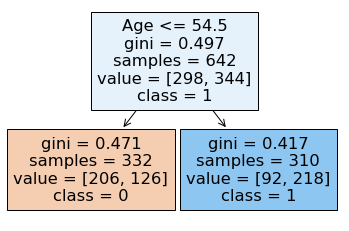

In [37]:
# Visualize the tree
viz = tree.plot_tree(classifier, feature_names=X.columns, class_names=list(['0', '1']) , filled=True)
# Alternatively, visualize the tree using dtreeviz package
#from dtreeviz.trees import dtreeviz
#viz = treeviz(clf, X, y, target_name="y", feature_names=X.columns, class_names=list(['0', '1']))
viz

**Question 3: Training Decision Trees**
* Question 3.1: Experiment with the X features included (currently only Age is included). Add MaxHR, RestingBP, or any other numerical features. (Note you cannot yet include categorical features such as ChestPainType). Include the train and test accuracy on various different sets of variables. Include a printout of the tree.
* Question 3.2: Discuss how various features affect the performance of the model.
* Question 3.3: Experiment with the max_depth hyperparementer parameter to DecisionTreeClassifier. How does that affect the results? Report train-accuracy and test-accuracy for various values of max_depth.
* Question 3.4: Why might the train-accuracy and test-accuracy differ?

**Question 3: Answers**
* Question 3.1: After experimenting with two different combinations of X features, I noticed that the train and test accuracies differ. For example, with the features ["Age", "RestingBP", "Cholesterol"], I had a training accuracy of 66.04% and test accuracy of 58.33%. While with the features ["Age", "FastingBS", "MaxHR"], I had a training accuracy of 67.60% and a test accuracy of 68.84%. Clearly, with different features the train and test accuracies can differ because each feature has a different percentage effect on heart disease. Data taken from code below.
* Question 3.2: Various features have different affects the performance of the model because each feature has a different correlation with heart disease. Some features affect the performance more because they have a higher meaningfulness towards heart disease which is shown in the percentages in dataframe.corr() above. Take for example MaxHR or Oldpeak which has the highest positive or negative correlation with heart disease, adding those variables may improve performance the most because they have the highest absolute value correlation. The opposite is true for some features which may not improve the model much because they might have a low correlation.
* Question 3.3: The max_depth parameter in the DecisionTreeClassifier model impacts the accuracies. When using all numerical features on a max-depth of 2, I achieved a training accuracy of 78.04% and a test accuracy of 81.16%. When using all numerical features on a max-depth of 3, I achieved a training accuracy of 79.75% and a test accuracy of 81.16%. An increase of 1 max-depth, from 2 to 3 max depth lead to an increase in training accuracy while test accuracy stayed the same. However, with a max-depth of 10 with all numerical features, I achieved a training accuracy of 96.24% and a test accuracy of 70.29%. Clearly, as you go up the number of max-depths you notice that for every depth you gain an increase of training accuracy. Unfortunately the same is not true for test accuracy because we lost a chunk of accuracy when moving from a max-depth of 3 to 10. This shows that at some point of the max-depth you will be trading test accuracy for training accuracy.
* Question 3.4: Training accuracy is the accuracy your model has with the data it trained with. While on the other hand test accuracy is the accuracy on data your model has not been trained with. The key detail here is that the training accuracy represents how well the model trained with the training data to make a line of best fit but not how well the model does on data it is not trained with. Therefore, the line of best fit created by the model may suit the training data but may not suit data it is not trained with.

**The proof is shown in the code below. There may be comments stating which question each block of code is meant to prove.**


The classifier accurately classifies 66.04% of train examples
The classifier accurately classifies 58.33% of test examples


[Text(0.5, 0.75, 'Age <= 54.5\ngini = 0.497\nsamples = 642\nvalue = [298, 344]\nclass = 1'),
 Text(0.25, 0.25, 'gini = 0.471\nsamples = 332\nvalue = [206, 126]\nclass = 0'),
 Text(0.75, 0.25, 'gini = 0.417\nsamples = 310\nvalue = [92, 218]\nclass = 1')]

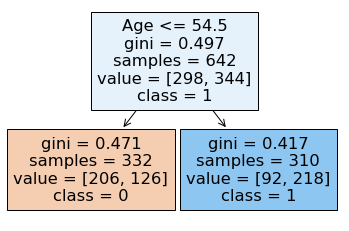

In [38]:
# Question 3.1: Experiment with the X features included (currently only Age is included). Add MaxHR, RestingBP, or any other numerical features. (Note you cannot yet include categorical features such as ChestPainType). Include the train and test accuracy on various different sets of variables. Include a printout of the tree.
# Choose one X variables to predict from. We can add more variables into X here.
X = dataframe[["Age", "RestingBP", "Cholesterol"]]

# y variable is the target label we want to predict.
y = dataframe["HeartDisease"]

# Split data into two sections. 70% will be for training, 30% will be for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
# Question 3.1: Experiment with the X features included (currently only Age is included). Add MaxHR, RestingBP, or any other numerical features. (Note you cannot yet include categorical features such as ChestPainType). Include the train and test accuracy on various different sets of variables. Include a printout of the tree.
classifier = tree.DecisionTreeClassifier(max_depth=1)# Visualize the tree
classifier = classifier.fit(X_train, y_train)

# Predict and measure the accuracy on the training set.
predicted_y_train = classifier.predict(X_train)
accuracy = accuracy_score(y_train, predicted_y_train)
print(f"The classifier accurately classifies {accuracy*100:.2f}% of train examples")

# Predict and measure the accuracy on the testing set.
predicted_y_test = classifier.predict(X_test)
accuracy = accuracy_score(y_test, predicted_y_test)
print(f"The classifier accurately classifies {accuracy*100:.2f}% of test examples")

# Visualize the tree
viz = tree.plot_tree(classifier, feature_names=X.columns, class_names=list(['0', '1']) , filled=True)
viz

The classifier accurately classifies 67.60% of train examples
The classifier accurately classifies 68.84% of test examples


[Text(0.5, 0.75, 'MaxHR <= 132.5\ngini = 0.497\nsamples = 642\nvalue = [298, 344]\nclass = 1'),
 Text(0.25, 0.25, 'gini = 0.385\nsamples = 284\nvalue = [74, 210]\nclass = 1'),
 Text(0.75, 0.25, 'gini = 0.468\nsamples = 358\nvalue = [224, 134]\nclass = 0')]

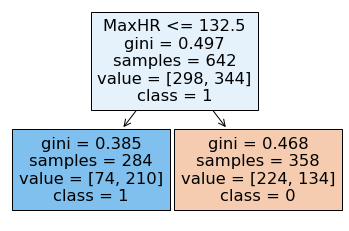

In [39]:
# Question 3.1: Experiment with the X features included (currently only Age is included). Add MaxHR, RestingBP, or any other numerical features. (Note you cannot yet include categorical features such as ChestPainType). Include the train and test accuracy on various different sets of variables. Include a printout of the tree.
# Choose one X variables to predict from. We can add more variables into X here.
X = dataframe[["Age", "FastingBS", "MaxHR"]]

# y variable is the target label we want to predict.
y = dataframe["HeartDisease"]

# Split data into two sections. 70% will be for training, 30% will be for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
# Question 3.1: Experiment with the X features included (currently only Age is included). Add MaxHR, RestingBP, or any other numerical features. (Note you cannot yet include categorical features such as ChestPainType). Include the train and test accuracy on various different sets of variables. Include a printout of the tree.
classifier = tree.DecisionTreeClassifier(max_depth=1)# Visualize the tree
classifier = classifier.fit(X_train, y_train)

# Predict and measure the accuracy on the training set.
predicted_y_train = classifier.predict(X_train)
accuracy = accuracy_score(y_train, predicted_y_train)
print(f"The classifier accurately classifies {accuracy*100:.2f}% of train examples")

# Predict and measure the accuracy on the testing set.
predicted_y_test = classifier.predict(X_test)
accuracy = accuracy_score(y_test, predicted_y_test)
print(f"The classifier accurately classifies {accuracy*100:.2f}% of test examples")

# Visualize the tree
viz = tree.plot_tree(classifier, feature_names=X.columns, class_names=list(['0', '1']) , filled=True)
viz

In [40]:
# Choose one X variables to predict from. We can add more variables into X here.
X = dataframe[["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]]

# y variable is the target label we want to predict.
y = dataframe["HeartDisease"]

# Split data into two sections. 70% will be for training, 30% will be for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

The classifier accurately classifies 78.04% of train examples
The classifier accurately classifies 81.16% of test examples


[Text(0.5, 0.8333333333333334, 'Oldpeak <= 0.75\ngini = 0.497\nsamples = 642\nvalue = [298, 344]\nclass = 1'),
 Text(0.25, 0.5, 'Cholesterol <= 42.5\ngini = 0.436\nsamples = 336\nvalue = [228, 108]\nclass = 0'),
 Text(0.125, 0.16666666666666666, 'gini = 0.26\nsamples = 52\nvalue = [8, 44]\nclass = 1'),
 Text(0.375, 0.16666666666666666, 'gini = 0.349\nsamples = 284\nvalue = [220, 64]\nclass = 0'),
 Text(0.75, 0.5, 'MaxHR <= 150.5\ngini = 0.353\nsamples = 306\nvalue = [70, 236]\nclass = 1'),
 Text(0.625, 0.16666666666666666, 'gini = 0.271\nsamples = 247\nvalue = [40, 207]\nclass = 1'),
 Text(0.875, 0.16666666666666666, 'gini = 0.5\nsamples = 59\nvalue = [30, 29]\nclass = 0')]

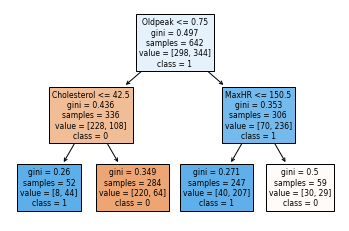

In [41]:
# Question 3.3: Experiment with the max_depth hyperparementer parameter to DecisionTreeClassifier. How does that affect the results? Report train-accuracy and test-accuracy for various values of max_depth.
classifier = tree.DecisionTreeClassifier(max_depth=2)# Visualize the tree
classifier = classifier.fit(X_train, y_train)

# Predict and measure the accuracy on the training set.
predicted_y_train = classifier.predict(X_train)
accuracy = accuracy_score(y_train, predicted_y_train)
print(f"The classifier accurately classifies {accuracy*100:.2f}% of train examples")

# Predict and measure the accuracy on the testing set.
predicted_y_test = classifier.predict(X_test)
accuracy = accuracy_score(y_test, predicted_y_test)
print(f"The classifier accurately classifies {accuracy*100:.2f}% of test examples")

# Visualize the tree
viz = tree.plot_tree(classifier, feature_names=X.columns, class_names=list(['0', '1']) , filled=True)
viz

The classifier accurately classifies 79.75% of train examples
The classifier accurately classifies 81.16% of test examples


[Text(0.5, 0.875, 'Oldpeak <= 0.75\ngini = 0.497\nsamples = 642\nvalue = [298, 344]\nclass = 1'),
 Text(0.25, 0.625, 'Cholesterol <= 42.5\ngini = 0.436\nsamples = 336\nvalue = [228, 108]\nclass = 0'),
 Text(0.125, 0.375, 'FastingBS <= 0.5\ngini = 0.26\nsamples = 52\nvalue = [8, 44]\nclass = 1'),
 Text(0.0625, 0.125, 'gini = 0.408\nsamples = 28\nvalue = [8, 20]\nclass = 1'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]\nclass = 1'),
 Text(0.375, 0.375, 'Age <= 56.5\ngini = 0.349\nsamples = 284\nvalue = [220, 64]\nclass = 0'),
 Text(0.3125, 0.125, 'gini = 0.239\nsamples = 209\nvalue = [180, 29]\nclass = 0'),
 Text(0.4375, 0.125, 'gini = 0.498\nsamples = 75\nvalue = [40, 35]\nclass = 0'),
 Text(0.75, 0.625, 'MaxHR <= 150.5\ngini = 0.353\nsamples = 306\nvalue = [70, 236]\nclass = 1'),
 Text(0.625, 0.375, 'Oldpeak <= 1.65\ngini = 0.271\nsamples = 247\nvalue = [40, 207]\nclass = 1'),
 Text(0.5625, 0.125, 'gini = 0.36\nsamples = 119\nvalue = [28, 91]\nclass = 1'),
 Text(0.6

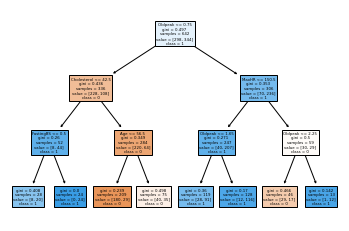

In [42]:
# Question 3.3: Experiment with the max_depth hyperparementer parameter to DecisionTreeClassifier. How does that affect the results? Report train-accuracy and test-accuracy for various values of max_depth.
classifier = tree.DecisionTreeClassifier(max_depth=3)# Visualize the tree
classifier = classifier.fit(X_train, y_train)

# Predict and measure the accuracy on the training set.
predicted_y_train = classifier.predict(X_train)
accuracy = accuracy_score(y_train, predicted_y_train)
print(f"The classifier accurately classifies {accuracy*100:.2f}% of train examples")

# Predict and measure the accuracy on the testing set.
predicted_y_test = classifier.predict(X_test)
accuracy = accuracy_score(y_test, predicted_y_test)
print(f"The classifier accurately classifies {accuracy*100:.2f}% of test examples")

viz = tree.plot_tree(classifier, feature_names=X.columns, class_names=list(['0', '1']) , filled=True)
# Alternatively, visualize the tree using dtreeviz package
#from dtreeviz.trees import dtreeviz
#viz = treeviz(clf, X, y, target_name="y", feature_names=X.columns, class_names=list(['0', '1']))
viz

The classifier accurately classifies 96.73% of train examples
The classifier accurately classifies 68.12% of test examples


[Text(0.5272623697916666, 0.9545454545454546, 'Oldpeak <= 0.75\ngini = 0.497\nsamples = 642\nvalue = [298, 344]\nclass = 1'),
 Text(0.2001410590277778, 0.8636363636363636, 'Cholesterol <= 42.5\ngini = 0.436\nsamples = 336\nvalue = [228, 108]\nclass = 0'),
 Text(0.04513888888888889, 0.7727272727272727, 'FastingBS <= 0.5\ngini = 0.26\nsamples = 52\nvalue = [8, 44]\nclass = 1'),
 Text(0.03819444444444445, 0.6818181818181818, 'MaxHR <= 106.5\ngini = 0.408\nsamples = 28\nvalue = [8, 20]\nclass = 1'),
 Text(0.020833333333333332, 0.5909090909090909, 'RestingBP <= 122.5\ngini = 0.165\nsamples = 11\nvalue = [1, 10]\nclass = 1'),
 Text(0.013888888888888888, 0.5, 'MaxHR <= 95.0\ngini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = 1'),
 Text(0.006944444444444444, 0.4090909090909091, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = 1'),
 Text(0.020833333333333332, 0.4090909090909091, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.027777777777777776, 0.5, 'gini = 0.0\nsamples = 7\nva

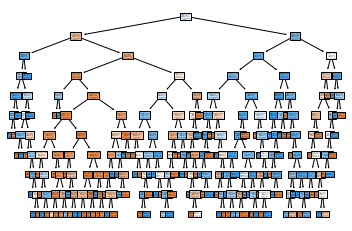

In [43]:
# Question 3.3: Experiment with the max_depth hyperparementer parameter to DecisionTreeClassifier. How does that affect the results? Report train-accuracy and test-accuracy for various values of max_depth.
classifier = tree.DecisionTreeClassifier(max_depth=10)# Visualize the tree
classifier = classifier.fit(X_train, y_train)

# Predict and measure the accuracy on the training set.
predicted_y_train = classifier.predict(X_train)
accuracy = accuracy_score(y_train, predicted_y_train)
print(f"The classifier accurately classifies {accuracy*100:.2f}% of train examples")

# Predict and measure the accuracy on the testing set.
predicted_y_test = classifier.predict(X_test)
accuracy = accuracy_score(y_test, predicted_y_test)
print(f"The classifier accurately classifies {accuracy*100:.2f}% of test examples")

viz = tree.plot_tree(classifier, feature_names=X.columns, class_names=list(['0', '1']) , filled=True)
# Alternatively, visualize the tree using dtreeviz package
#from dtreeviz.trees import dtreeviz
#viz = treeviz(clf, X, y, target_name="y", feature_names=X.columns, class_names=list(['0', '1']))
viz